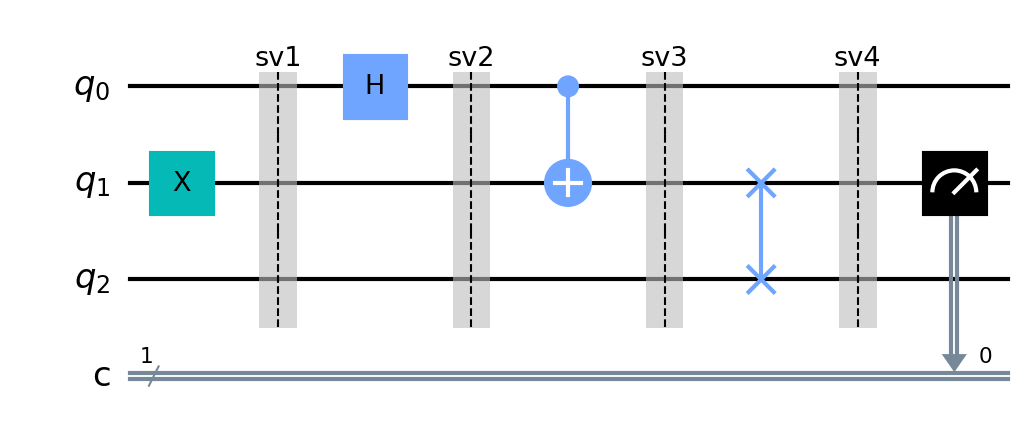

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

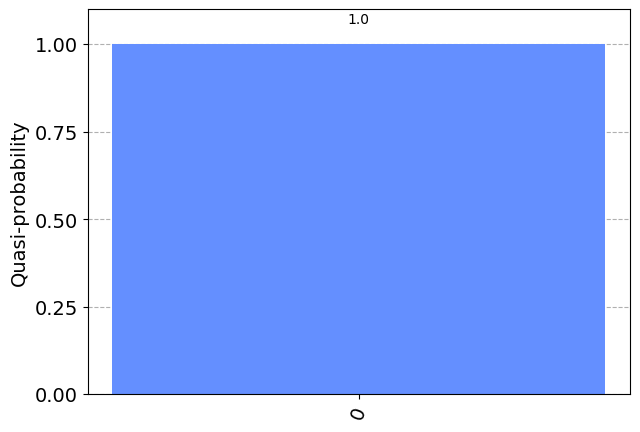

In [17]:
"""quantum_circuit1.ipynb"""
# This script uses IBM Qiskit quantum gates to create a quantum circuit and saves 4 designated state vectors throughout its duration.

# Allows for type hinting
from __future__ import annotations

# Type hinting
import typing

# Calculations
import numpy as np

# Printing functions using latex formatting
from qis101_utils import as_latex

# IBM Qiskit quantum circuit elements
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_state_qsphere  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Cell 1-> implement the circuit

# Fire up a backend simulator on your computer
backend: Any = Aer.get_backend("statevector_simulator")
# Quantum circuit with 3 qubits and 1 classical bit
qc: Any = QuantumCircuit(3, 1)

# TODO: Implement your circuit here

# Not q1
qc.x(1)
# Take a snap shot of the state vector afterwards
qc.save_statevector("sv1")
# hadamard on q0
qc.h(0)
# Take a snap shot of the state vector afterwards
qc.save_statevector("sv2")
# CNOT q0 and q1
qc.cx(0, 1)
# Take a snap shot of the state vector
qc.save_statevector("sv3")
# Swap q1 and q2
qc.swap(1, 2)
# Take a final snap shot of the state vector
qc.save_statevector("sv4")
# Measure q1
qc.measure(1, 0)
# Do not modify the following code
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

display(plot_distribution(counts))  # type: ignore

In [15]:
# Cell 2

# 1.) Explain the results shown in Statevector 4

""" The circuit begins with 3 qubits initialized to the 0 state and 1 classical bit. 
    Q1 is passed through an inverter gate which turns the qubit onto the high state. 
    Thus, the only possible output state following the x gate is |010}. 
    Then, a Hadamard gate is applied to q0, which puts that qubit into a 50/50 superposition state of 0 and 1, thereby making the possible output states |010} and |011}. 
    The CNOT gate then entangles q0 and q1 with q0 as the control and q1 as the target such that a NOT gate is operated on q1 if q0 is high, which will then turn q1 high. 
    The possible states then become |001} and |010} because when q0=0→ q1=1 and when q0=1→ q1=0. 
    Finally, the circuit swaps q1 and q2 such that the middle element of the state becomes a constant 0 and the two outer elements disagree with each other while flipping between a 0 and a 1. 
    Therefore, the final state vector has a 50/50 probability of having either a state of |001} or |100}. 
"""

# 2.) Explain why is there a 100% chance of measuring only a value of 0 for the single classical bit?

""" The result of the measurement of q1 is projected onto the classical bit. 
    Since q2 has just been swapped with q1, q1 will take on the value of whatever q2 was. 
    Q2 was initialized to the 0 state and then was left untouched such that it always equals a 0. 
    Therefore, the probability of q1/ the classical bit being a 0 is now 100%. 
"""

' The circuit begins with 3 qubits initialized to the 0 state and 1 classical bit. \n    Q1 is passed through an inverter gate which turns the qubit onto the high state. \n    Thus, the only possible output state following the x gate is |010}. \n    Then, a Hadamard gate is applied to q0, which puts that qubit into a 50/50 superposition state of 0 and 1, thereby making the possible output states |010} and |011}. \n    The CNOT gate then entangles q0 and q1 with q0 as the control and q1 as the target such that a NOT gate is operated on q1 if q0 is high, which will then turn q1 high. \n    The possible states then become |001} and |010} because when q0=0→ q1=1 and when q0=1→ q1=0. \n    Finally, the circuit swaps q1 and q2 such that the middle element of the state becomes a constant 0 and the two outer elements disagree with each other while flipping between a 0 and a 1. \n    Therefore, the final state vector has a 50/50 probability of having either a state of |001} or |100}. \n'